In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from procedures import (
    create_binance_bot,
    create_binance_bot_spot,
    create_bybit_bot,
    load_exchange_key_secret,
)
from pure_funcs import get_template_live_config, ts_to_date, get_daily_from_income
from njit_funcs import round_dynamic
from time import time
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
plt.rcParams["figure.figsize"] = [21, 13]
pd.set_option("display.precision", 10)

In [11]:
config = get_template_live_config()
config["market_type"] = "futures"
config["user"] = "binance_01"
config["exchange"], _, _ = load_exchange_key_secret(config["user"])

n_days = 30
start_time = (time() - 60 * 60 * 24 * n_days) * 1000
end_time = time() * 1000

symbols = [
    "XRPUSDT",
    "XLMUSDT",
    "ADAUSDT",
    "EOSUSDT",
    "BNBUSDT",
    "LINKUSDT",
    "COMPUSDT",
    "FILUSDT",
]

incomes = []
# binance fetches income for all symbols; bybit only one symbol at a time
for symbol in symbols if config["exchange"] == "bybit" else symbols[:1]:
    config["symbol"] = symbol
    try:
        await bot.session.close()
    except:
        pass
    if config["exchange"] == "binance":
        if config["market_type"] == "spot":
            bot = await create_binance_bot_spot(config)
        else:
            bot = await create_binance_bot(config)
    elif config["exchange"] == "bybit":
        bot = await create_bybit_bot(config)

    await bot.update_position()
    balance = bot.position["wallet_balance"]

    income = await bot.get_all_income(start_time=start_time)
    incomes += income
idf, bdf = get_daily_from_income(
    sorted(incomes, key=lambda x: x["timestamp"]),
    bot.position["wallet_balance"],
    start_time=start_time,
    end_time=end_time,
)

linear perpetual
2022-01-30T08:33:18  fetched income 2022-01-16T16:32:59 


current balance 0.50769
abs sum -58.04 USDT
abs adg -1.935 USDT
pct sum -114.32762
pct adg nan


C:\Users\skhan\AppData\Local\Temp/ipykernel_299460/1652476687.py:5: RuntimeWarning: invalid value encountered in double_scalars
  print(f"pct adg {((balance + idf.income.sum()) / balance) ** (1 / n_days) - 1:.5f}")


<AxesSubplot:xlabel='timestamp'>

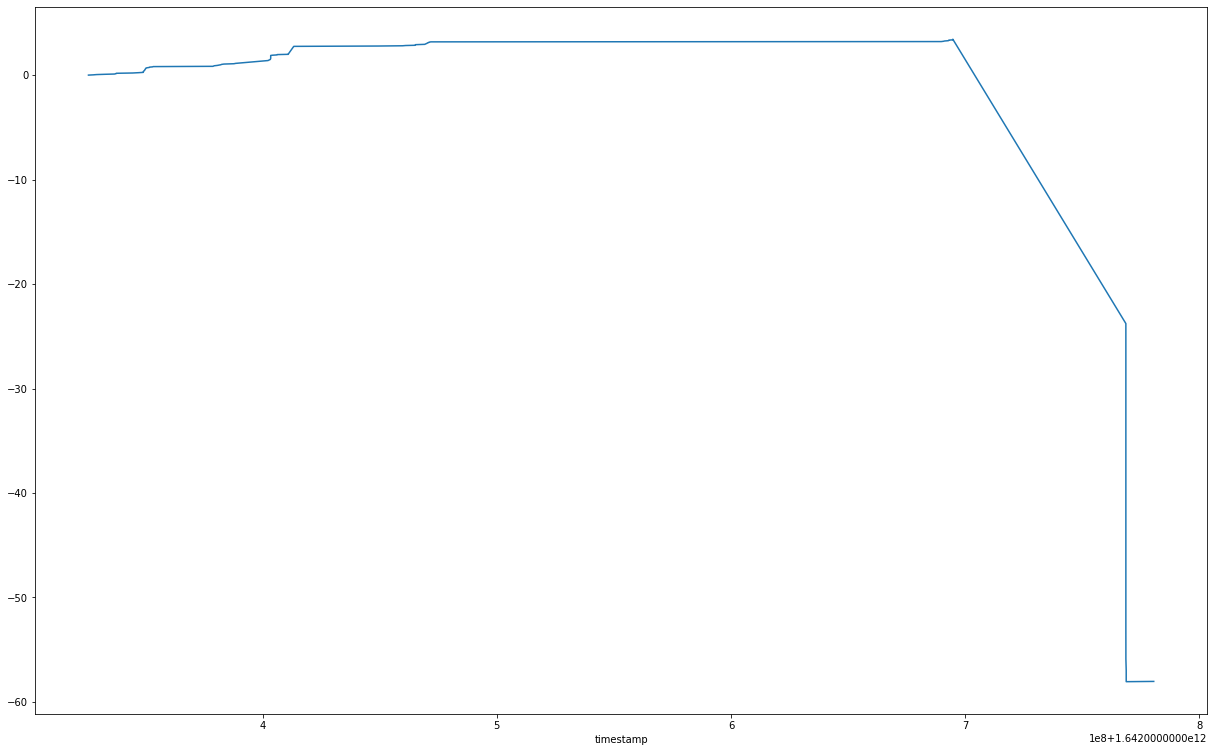

In [12]:
print(f"current balance {round_dynamic(balance, 5)}")
print(f'abs sum {round_dynamic(idf.income.sum(), 4)} {idf.iloc[-1]["token"]}')
print(f'abs adg {round_dynamic(idf.income.sum() / n_days, 4)} {idf.iloc[-1]["token"]}')
print(f"pct sum {((balance + idf.income.sum()) / balance) - 1:.5f}")
print(f"pct adg {((balance + idf.income.sum()) / balance) ** (1 / n_days) - 1:.5f}")

idf.income.cumsum().plot()

In [13]:
idf.tail(20)

,symbol,income_type,income,token,timestamp,info,transaction_id,trade_id,datetime
timestamp,,,,,,,,,
1642690742000.0,DYDXUSDT,realized_pnl,0.02730000,USDT,1642690742000.0,98468009,9.2730984680e+12,98468009.0,2022-01-20T21:59:02
1642691192000.0,DYDXUSDT,realized_pnl,0.02730000,USDT,1642691192000.0,98478556,9.2730984786e+12,98478556.0,2022-01-20T22:06:32
1642692756000.0,DYDXUSDT,realized_pnl,0.02800000,USDT,1642692756000.0,98507966,9.2730985080e+12,98507966.0,2022-01-20T22:32:36
1642693029000.0,DYDXUSDT,realized_pnl,0.02800000,USDT,1642693029000.0,98517125,9.2730985171e+12,98517125.0,2022-01-20T22:37:09
1642693048000.0,DYDXUSDT,realized_pnl,0.02800000,USDT,1642693048000.0,98519571,9.2730985196e+12,98519571.0,2022-01-20T22:37:28
1642694703000.0,DYDXUSDT,realized_pnl,0.02800000,USDT,1642694703000.0,98549744,9.2730985497e+12,98549744.0,2022-01-20T23:05:03
1642694724000.0,DYDXUSDT,realized_pnl,0.02800000,USDT,1642694724000.0,98552120,9.2730985521e+12,98552120.0,2022-01-20T23:05:24
1642694738000.0,DYDXUSDT,realized_pnl,0.02870000,USDT,1642694738000.0,98559116,9.2730985591e+12,98559116.0,2022-01-20T23:05:38
1642768640000.0,SOLUSDT,realized_pnl,-27.23000000,USDT,1642768640000.0,318812814,9.1070318813e+13,318812814.0,2022-01-21T19:37:20


In [14]:
bdf

,abs_income,gain,cumulative
2021-12-31T07:00:00,0.00000000,0.0000000000,58.55061946
2022-01-01T07:00:00,0.00000000,0.0000000000,58.55061946
2022-01-02T07:00:00,0.00000000,0.0000000000,58.55061946
2022-01-03T07:00:00,0.00000000,0.0000000000,58.55061946
2022-01-04T07:00:00,0.00000000,0.0000000000,58.55061946
2022-01-05T07:00:00,0.00000000,0.0000000000,58.55061946
2022-01-06T07:00:00,0.00000000,0.0000000000,58.55061946
2022-01-07T07:00:00,0.00000000,0.0000000000,58.55061946
2022-01-08T07:00:00,0.00000000,0.0000000000,58.55061946
2022-01-09T07:00:00,0.00000000,0.0000000000,58.55061946


<AxesSubplot:>

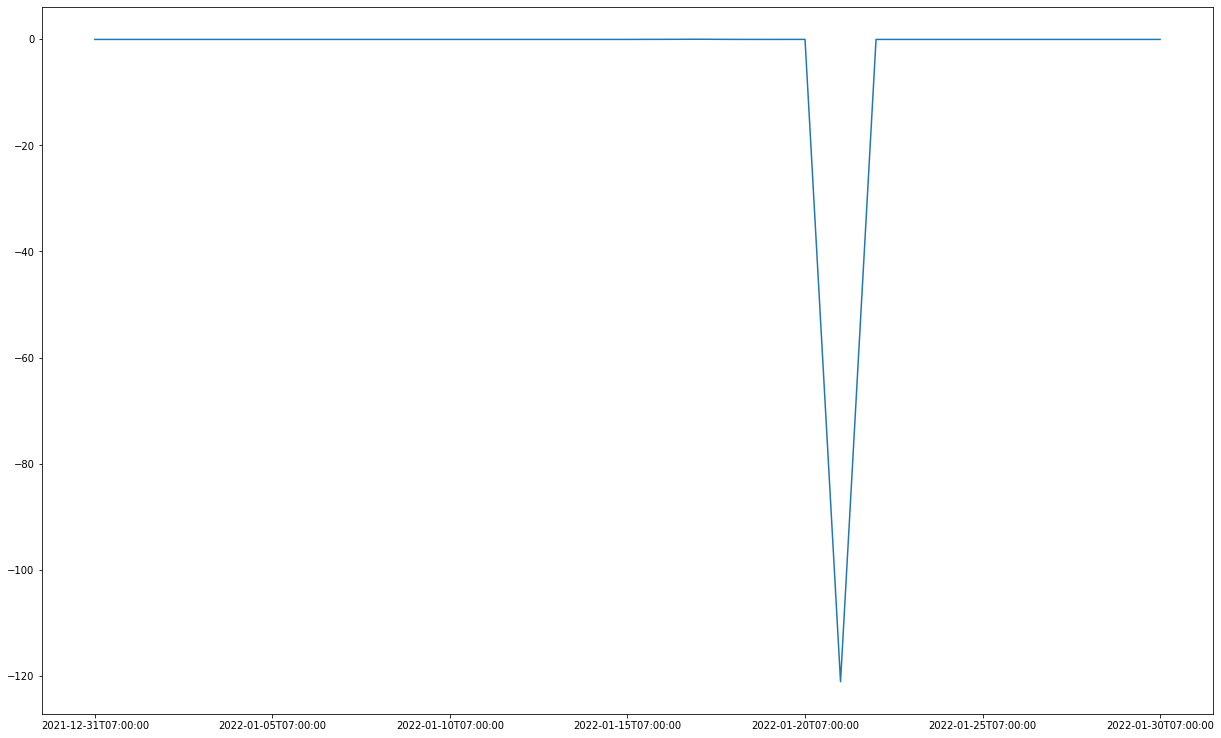

In [15]:
bdf.gain.plot()

In [16]:
# check income last x days
x = 3
since = (time() - 60 * 60 * 24 * x) * 1000
idf[idf.timestamp > since].groupby("symbol").income.sum().sort_values()

Series([], Name: income, dtype: float64)